In [1]:
from numpy import *
from scipy import *
import numpy as np
import scipy as sp
from scipy.stats import entropy as entroG

from pylab import *
from math import factorial
from scipy.special import jv, j0, j1
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable 

from IPython import display

In [2]:
J = 0.13
Tmax = 500 * J
Tp = 60
print(Tp)
Tnum = 2000
NNmax = 30.5
NNmin = 9.5

fsc = np.genfromtxt('snt.csv', delimiter=',')
psc = np.genfromtxt('pnt.csv', delimiter=',')
Esc = np.genfromtxt('Et.csv', delimiter=',')
ft112 = np.genfromtxt('ftSnt-long-112.csv', delimiter=',')
ft123 = np.genfromtxt('ftSnt-123-500.csv', delimiter=',')
#ft123 = np.genfromtxt('ftSnt-123-1k.csv', delimiter=',')

print( fsc.max() )
print( psc.max() )
print( Esc[0].max(),"   ",Esc[0].min() )


st = np.mean(fsc, axis=0)
shape(st)

60
0.9847315600932606
1.0000000000000258
0.11200552199573026     0.10433333333333585


(2001,)

0.2971545692279301
0.015384615384615385
0.006666666666666667


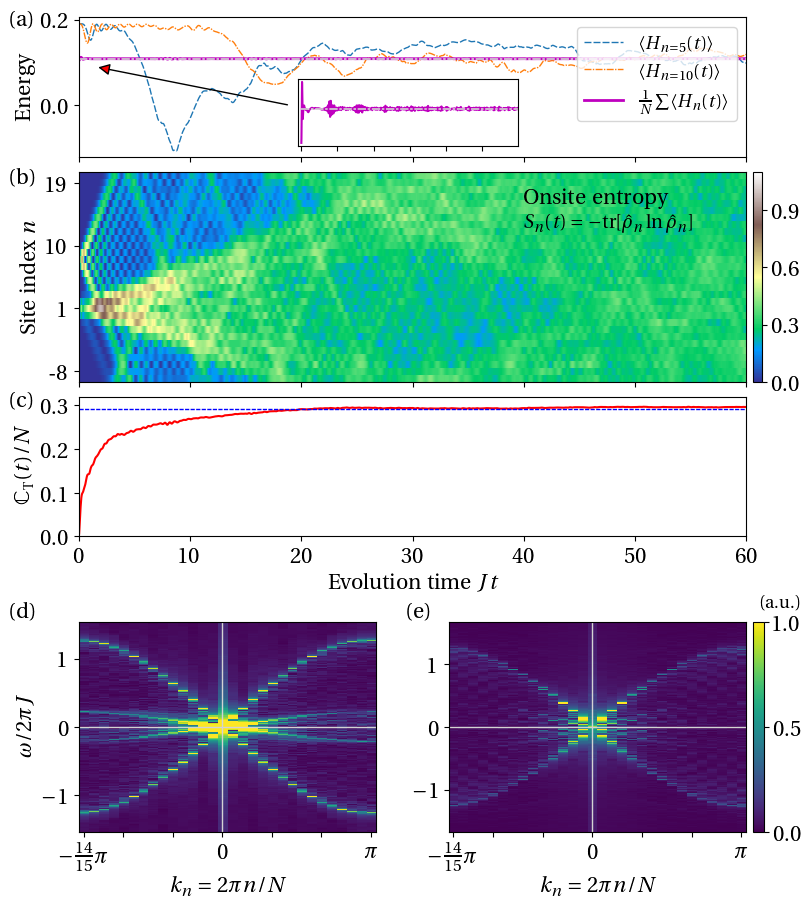

In [3]:
mpl.rcParams['font.size'] = 17
#mpl.rcParams['axes.titlesize'] = 'medium'
#mpl.rcParams['font.serif'] = 'Utopia'
#mpl.rcParams['font.serif'] = 'Nimbus Roman No9 L'
mpl.rcParams['font.serif'] = 'Times New Roman'

t30 = 27.2572
tt = linspace(0, Tmax, Tnum+1)


fig = plt.figure(figsize=(8, 9))
gs = gridspec.GridSpec(5, 4, height_ratios=[2,3,2,0.8, 3], width_ratios=[6, 1.2, 6, 1] )

ax11 = fig.add_subplot(gs[0, :3])
ax12 = fig.add_subplot(gs[0, 3]) 
ax21 = fig.add_subplot(gs[1, :3])
ax22 = fig.add_subplot(gs[1, 3]) 
ax31 = fig.add_subplot(gs[2, :3])
ax32 = fig.add_subplot(gs[2, 3]) 
ax4 = fig.add_subplot(gs[3, :]) 
ax51 = fig.add_subplot(gs[4, 0])
ax52 = fig.add_subplot(gs[4, 1]) 
ax53 = fig.add_subplot(gs[4, 2]) 
ax54 = fig.add_subplot(gs[4, 3]) 


ax12.axis('off')
ax22.axis('off')
ax32.axis('off')
ax4.axis('off')
ax52.axis('off')
ax54.axis('off')
ax12.set_xticks([])
ax12.set_yticks([])
ax11.set_xticklabels([])
ax21.set_xticklabels([])
#ax31.set_xticklabels([])
#ax41.set_xticklabels([])


EE0 = 0.108624 # Mean onsite energy
h1 = -0.875
h2 = -0.62

ax11.plot(tt, Esc[1], dashes=(5,1.5), lw=1, label=r"$\langle {H}_{n=5}(t) \rangle $")
ax11.plot(tt, Esc[2], dashes=(5,1,1,1), lw=1, label=r"$\langle {H}_{n=10}(t) \rangle $")
ax11.plot(tt, Esc[0], lw=2, color='m', label=r"$\tfrac{1}{N}\sum \langle H_n (t) \rangle $")
ax11.set_xlim(0,Tp)
#ax21.set_ylim(h1,h2)
#ax21.set_yticks([0.8,0.9,1])
#ax21.plot([t30,t30],[h1, h2], color='gray', dashes=(5,1.5), lw=.8)
#ax21.plot([t30/2,t30/2],[h1, h2], color='gray', dashes=(5,1.5), lw=.8)
ax11.plot([0,Tp],[EE0, EE0], color='lightgray', dashes=(5,1,1.5,1), lw=1.2)
ax11.legend(loc="upper right", fontsize=14)
ax11.set_ylabel(r"Energy")

h1 = -0.818
h2 = -0.78
ax111 = ax11.inset_axes([0.328, 0.08, 0.33, 0.48])
ax111.set_xticklabels([])
ax111.set_xticks(range(0,51,10))
ax111.set_yticks([])
ax111.set_xlim(-1,Tp)
#ax211.set_ylim(h1, h2)
ax111.plot(tt,Esc[0], color='m')
#ax211.plot([t30,t30],[h1, h2], color='lightgray', dashes=(5,1.5), lw=.8)
#ax211.plot([t30/2,t30/2],[h1, h2], color='lightgray', dashes=(5,1.5), lw=.8)
ax111.plot([0,Tp],[EE0, EE0], color='lightgray', dashes=(5,1,1.5,1), lw=1.2)
#ax21.indicate_inset_zoom(ax211)

ax11.annotate("", (1.5, 0.09), (19, 0.), arrowprops=dict(arrowstyle="-|>", fc='r',ec='k'), zorder=10)

smax = 1.1
dm2 = ax21.imshow(fsc, origin='lower', extent=[0,Tp,0.5,30.5], \
                 aspect='auto', vmin=0,vmax=smax, interpolation="none", cmap='terrain')
cb2 = colorbar(dm2, ax=ax22, fraction=1, pad=0.0, aspect=25)
#ax21.plot([t1,t1],[1,30],color='lightgray', lw=0.5)
#ax21.plot([t2,t2],[1,30],color='lightgray', lw=0.5)
#ax21.plot([t3,t3],[1,30],color='lightgray', lw=0.5)
cb2.set_ticks(arange(0, smax, 0.3))
ax21.set_yticks([ 2, 11, 20, 29])
ax21.set_yticklabels([ -8, 1, 10, 19])
ax21.set_ylabel(r'Site index $n$')
ax21.set_xlim(0,Tp)
#ax21.plot([t30,t30],[1,30], color='w', dashes=(5,1.5), lw=1)
#ax21.plot([t30/2,t30/2],[1,30], color='w', dashes=(5,1.5), lw=1)
ax21.text(40, 26, r"Onsite entropy", color='k')
ax21.text(40, 22.5, r"$S_n(t)=-\mathrm{tr}[\hat{\rho}_n \ln \hat{\rho}_n]$", color='k', fontsize=15)


ss=0.29114
print(max(st))
ax31.plot(tt, st, 'r')
ax31.set_xlim(0,Tp)
ax31.set_ylim(-0.00, 0.32)
#ax51.set_xticks(arange(0,0.9,0.2))
ax31.set_yticks(arange(0,0.305,0.1))
ax31.set_ylabel(r"$\mathbb{C}_\text{\textsc{t}}(t)/N$")
ax31.set_xlabel(r"Evolution time $Jt$")
#ax51.plot([0.369,0.369],[0,0.4], color='lightgray', dashes=(5,2), lw=.5)
#ax31.plot([t30,t30],[0,0.4], color='gray', dashes=(5,1.5), lw=.8)
#ax31.plot([t30/2,t30/2],[0,0.4], color='gray', dashes=(5,1.5), lw=.8)
ax31.plot([0, Tp],[ss, ss], color='b', dashes=(3,1), lw=1)
#ax31.text(t30+.2,0.03, r"$\tau_\mathrm{rec}$")
#ax31.text(t30/2+.4,0.03, r"$\tfrac{1}{2}\tau_\mathrm{rec}$")

# wn=(2pi/Tmax)n_w , here Tmax already contain J, see above
fmax = 1.0
J = 0.13
Tmax = 500*J
dw = 1/Tmax # w=n*dw
print(dw)
dm5 = ax51.imshow(ft112[900:1100, :], origin='lower', aspect='auto', vmin=0,vmax=fmax, interpolation="none", extent=[-0.5,29.5,-100*dw,100*dw]) 
                #  cmap='terrain')
cb5 = colorbar(dm5, ax=ax54, fraction=1, pad=0.0, aspect=20)
cb5.set_ticks([0,0.5,1] )
ax51.set_ylim(-100*dw, 100*dw)
ax51.set_xticks([ 0,4,9,14,19,24,29])
ax51.set_xticklabels([ r"$-\frac{14}{15}\pi$","","", 0, "","", r"$\pi$"])
ax51.set_xlabel(r'$k_n=2\pi n/N$')
ax51.set_ylabel(r'$\omega/2\pi J$') #\quad [\times 10^{-4}]$')
ax51.plot([14,14],[-20,20],color='lightgray', lw=1)
ax51.plot([-0.4, 29.5],[0, 0],color='lightgray', lw=1)

J = 0.3
Tmax = 500*J
dw = 1/Tmax # w=n*dw
print(dw)
ax53.imshow(1.2*ft123[750:1250, :], origin='lower', aspect='auto', vmin=0,vmax=fmax, interpolation="none", extent=[-0.5,29.5,-250*dw,250*dw]) 
ax53.set_ylim(-250*dw,250*dw)
ax53.set_xlim(-0.4, 29.5)
ax53.set_xticks([ 0,4,9,14,19,24,29])
ax53.set_xticklabels([ r"$-\frac{14}{15}\pi$","","", 0, "","", r"$\pi$"])
ax53.set_xlabel(r'$k_n=2\pi n/N$')
ax53.plot([14,14],[-20,20],color='lightgray', lw=1)
ax53.plot([-0.4, 29.5],[0., 0.],color='lightgray', lw=1)

fig.text(0.004,0.976, r"(a)")
fig.text(0.004,0.8, r"(b)")
fig.text(0.004,0.552, r"(c)")
fig.text(0.004,0.318, r"(d)")
fig.text(0.5,0.318, r"(e)")
fig.text(0.942,0.328, r"(a.u.)", fontsize=14)

#fig.text(0.016,0.297, r"$(\times 10^{-4})$", fontsize=13)
#fig.text(0.48,0.297, r"$(\times 10^{-4})$", fontsize=13)

#plt.tight_layout()
fig.subplots_adjust(left=0.09, right=0.995, top=0.985, bottom=0.08, hspace=0.1, wspace=0.04)
